Develop lightweight models for online deployment using the ensemble TabPFN model with the Ersilia Compound Embeddings

In [1]:
import os
import pandas as pd
import joblib
from eosce.models import ErsiliaCompoundEmbeddings
from ensemble_tabpfn import EnsembleTabPFN

DATAPATH = "../data"
MODELPATH = "../models"

In [3]:
descriptor = ErsiliaCompoundEmbeddings()
clf = EnsembleTabPFN()

CUTOFF = 1

for i in range(1,6):
    train = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", "osm_train{}_{}.csv".format(i, CUTOFF)))
    test = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", "osm_test{}_{}.csv".format(i, CUTOFF)))
    train_transformed = descriptor.transform(train["smiles"])
    test_transformed = descriptor.transform(test["smiles"])
    clf.fit(train_transformed, train["bin"])
    joblib.dump(clf, os.path.join(MODELPATH, "tabpfn", "train{}_{}.joblib".format(i, CUTOFF)))
    proba1 = clf.predict_proba(test_transformed)
    test["proba1"]=proba1
    test["bin_pred"]=[0 if x < 0.5 else 1 for x in proba1]
    test.to_csv(os.path.join(DATAPATH, "tabpfn_results", "output_test{}_{}.csv".format(i, CUTOFF)), index=False)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


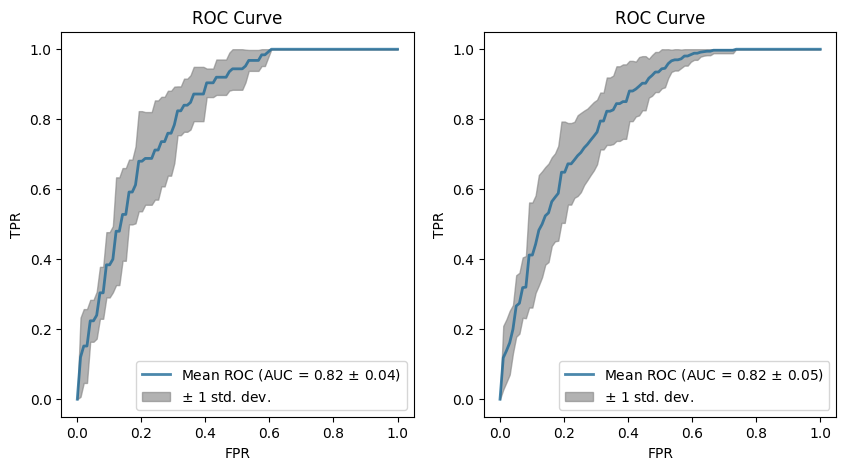

In [4]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

fig, axs = plt.subplots(1,2, figsize=(10,5))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

ax0 = axs[0]
for i in range(1,6):
    df = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", "osm_test{}_1.csv".format(i)))
    out = pd.read_csv(os.path.join(DATAPATH, "tabpfn_results", "output_test{}_1.csv".format(i)))
    yt = df["bin"]
    proba1 = out["proba1"]
    fpr, tpr, _ = metrics.roc_curve(yt, proba1)
    roc_auc = metrics.roc_auc_score(yt, proba1)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax0.plot(
    mean_fpr,
    mean_tpr,
    color="#1D6996",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8
)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax0.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax0.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title = "ROC Curve",
    xlabel = "FPR",
    ylabel="TPR"
    )
ax0.legend(loc="lower right")

ax1 = axs[1]
for i in range(1,6):
    df = pd.read_csv(os.path.join(DATAPATH, "train_test_splits", "osm_test{}_25.csv".format(i)))
    out = pd.read_csv(os.path.join(DATAPATH, "tabpfn_results", "output_test{}_25.csv".format(i)))
    yt = df["bin"]
    proba1 = out["proba1"]
    fpr, tpr, _ = metrics.roc_curve(yt, proba1)
    roc_auc = metrics.roc_auc_score(yt, proba1)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax1.plot(
    mean_fpr,
    mean_tpr,
    color="#1D6996",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8
)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax1.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"$\pm$ 1 std. dev.",
    )
ax1.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title = "ROC Curve",
    xlabel = "FPR",
    ylabel="TPR"
    )
ax1.legend(loc="lower right")